# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: Heart Attack Analysis & Prediction Dataset 
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset 

## About the dataset

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [7]:
#Install needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
heart = pd.read_csv("heart.csv")

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [38]:
#Check the shape of the dataframe
print('The dataframe has',heart.shape[0], 'rows and', heart.shape[1], 'columns')

The dataframe has 302 rows and 14 columns


In [ ]:
#Lets see the first 5 rows
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
#Check for datatypes and null count
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
#Check for duplicate rows
heart[heart.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [14]:
#Removing the duplicates
heart.drop_duplicates(keep='first',inplace=True)

In [39]:
#Checking shape to confirm dupe was dropped
print('The dataframe has',heart.shape[0], 'rows and', heart.shape[1], 'columns')

The dataframe has 302 rows and 14 columns


In [17]:
#Lets learn more by looking at the stats
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

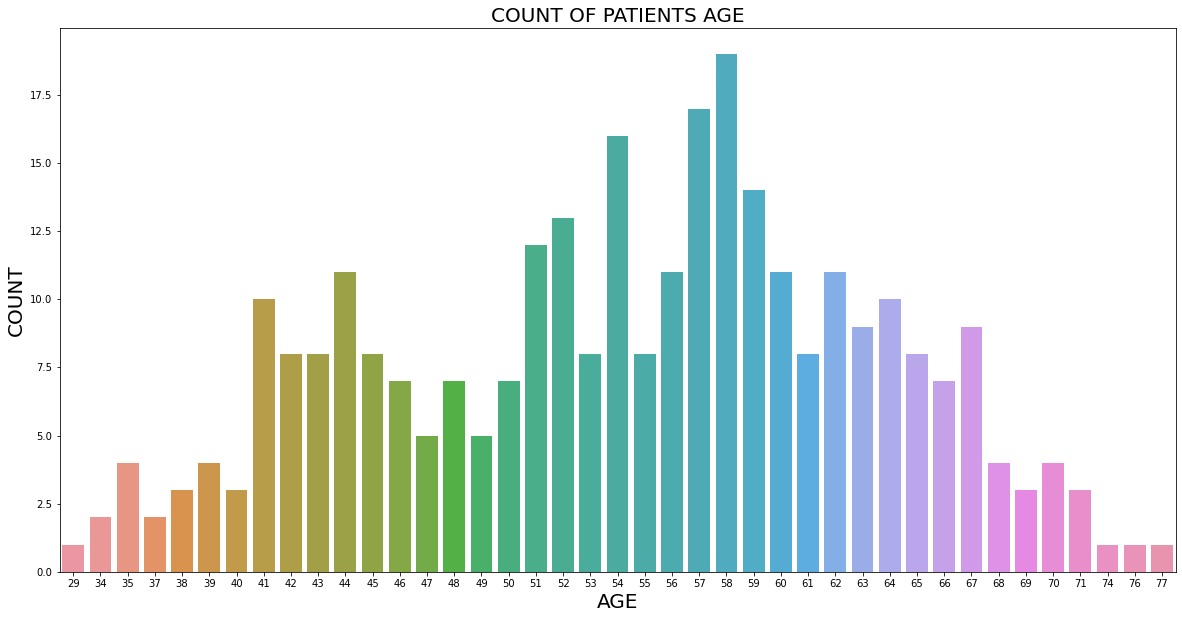

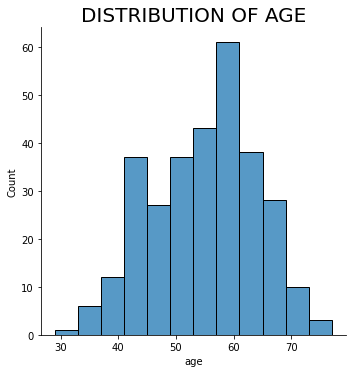

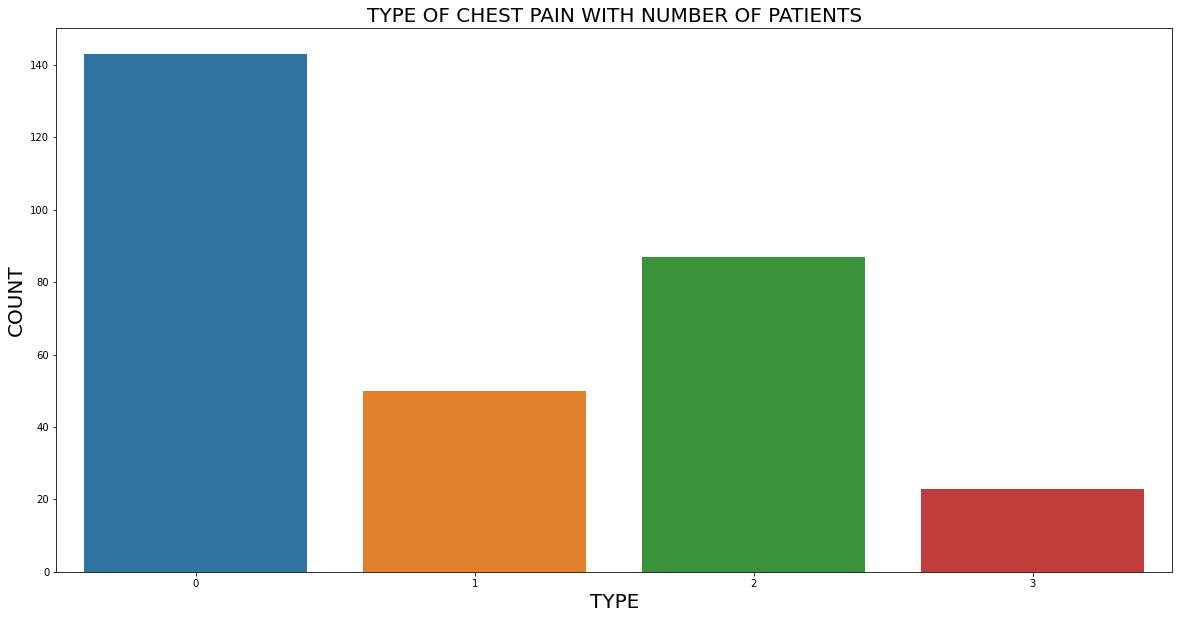

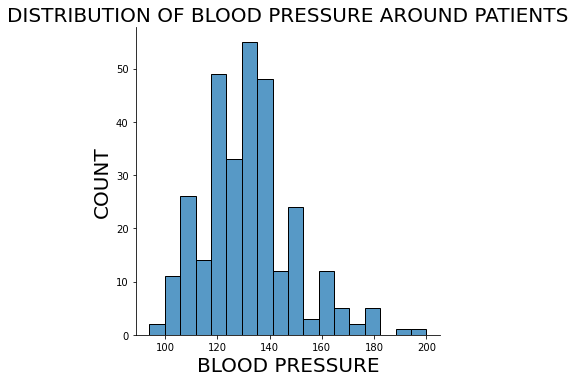

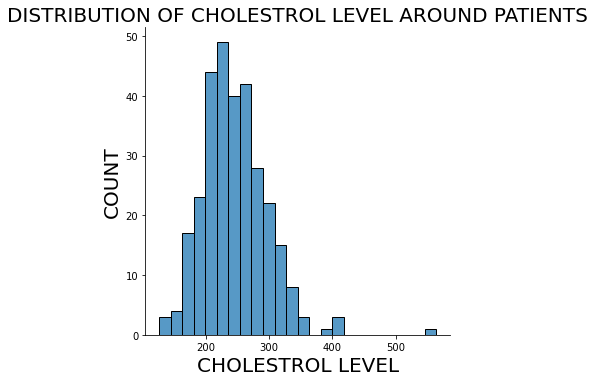

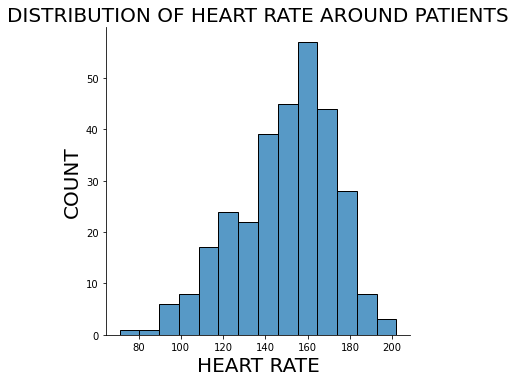

In [41]:

import plotly.express as px

plt.figure(figsize=(20,10))
sns.countplot(x=df["age"])
plt.title("COUNT OF PATIENTS AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

sns.displot(df["age"])
plt.title("DISTRIBUTION OF AGE",fontsize=20)
plt.show()

s=df["sex"].value_counts().reset_index()
px.pie(s,names="index",values="sex",title="%AGE OF MALE AND FEMALE PATIENTS:")
c=df["cp"].value_counts().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x=c["index"],y=c["cp"])
plt.title("TYPE OF CHEST PAIN WITH NUMBER OF PATIENTS",fontsize=20)
plt.xlabel("TYPE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

sns.displot(df["trtbps"])
plt.title("DISTRIBUTION OF BLOOD PRESSURE AROUND PATIENTS",fontsize=20)
plt.xlabel("BLOOD PRESSURE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

sns.displot(df["chol"])
plt.title("DISTRIBUTION OF CHOLESTROL LEVEL AROUND PATIENTS",fontsize=20)
plt.xlabel("CHOLESTROL LEVEL",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

sns.displot(df["thalachh"])
plt.title("DISTRIBUTION OF HEART RATE AROUND PATIENTS",fontsize=20)
plt.xlabel("HEART RATE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

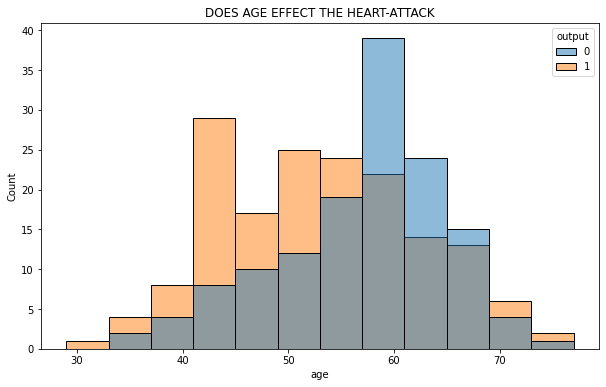

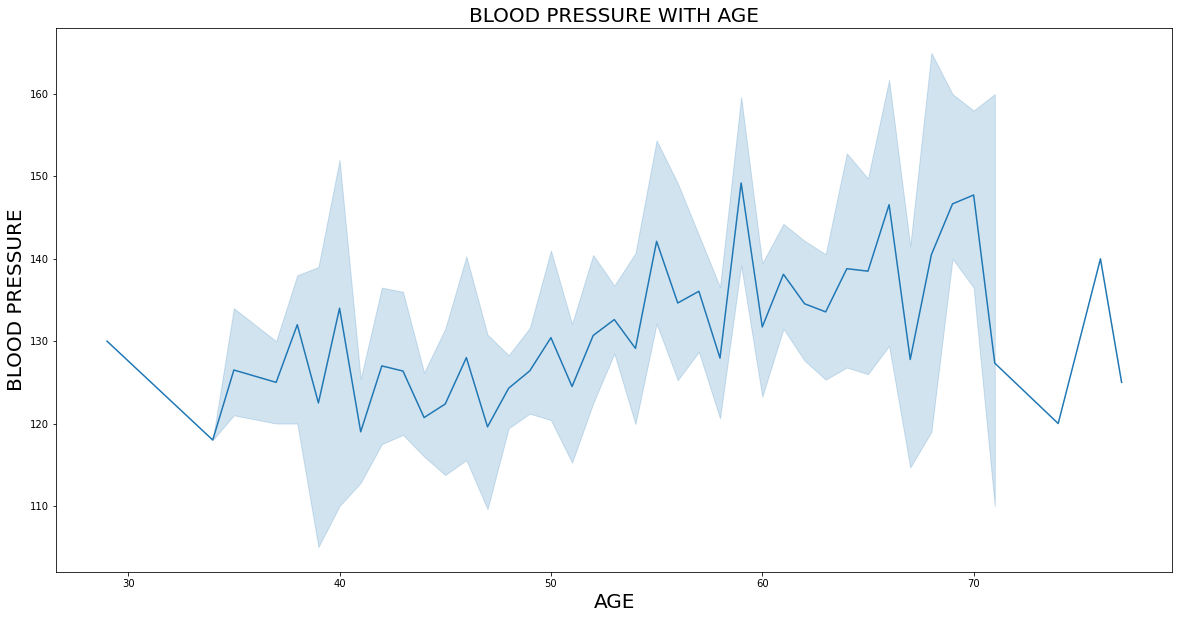

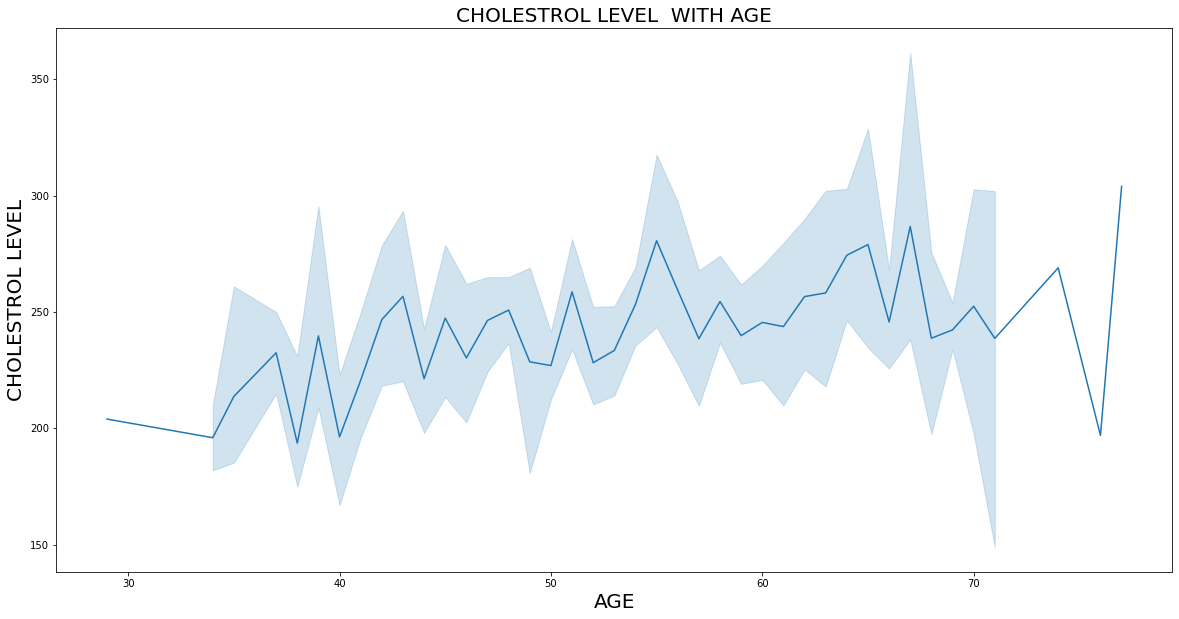

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = 'age', hue = 'output')
plt.title("DOES AGE EFFECT THE HEART-ATTACK")
plt.show()

v=pd.crosstab(df["age"],df["output"]).reset_index()

v.columns=["age","low_risk","high_risk"]

px.line(v,v["age"],v["high_risk"],title="RISK OF HIGH HEART-ATTACK WITH AGE")
px.line(v,v["age"],v["low_risk"],title="RISK OF LOW HEART-ATTACK WITH AGE")
plt.figure(figsize=(20,10))
sns.lineplot(y="trtbps",x="age",data=df)
plt.title("BLOOD PRESSURE WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("BLOOD PRESSURE",fontsize=20)
plt.show()

plt.figure(figsize=(20,10))
sns.lineplot(y="chol",x="age",data=df)
plt.title("CHOLESTROL LEVEL  WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("CHOLESTROL LEVEL",fontsize=20)
plt.show()

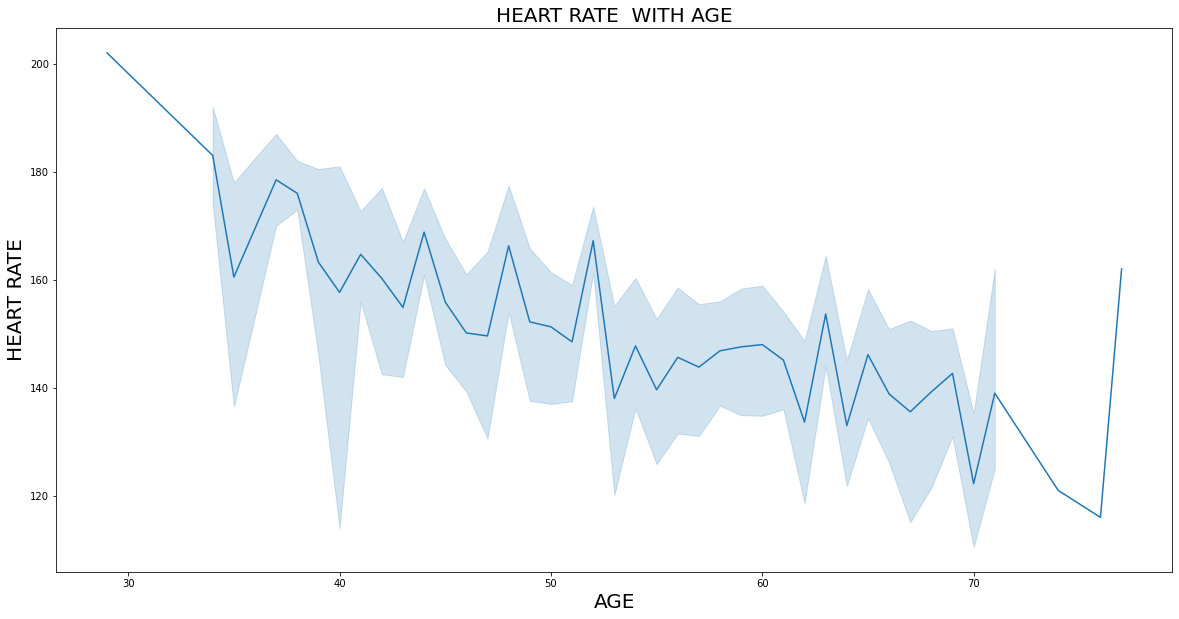

In [44]:
plt.figure(figsize=(20,10))
sns.lineplot(y="thalachh",x="age",data=df)
plt.title("HEART RATE  WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("HEART RATE",fontsize=20)
plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
> I expected that as age increased, the chance of a heart attack would increase, which is does- up to a point; then the chances decrease.

2. Do you have any concerns about your dataset? 
> My main concern is that the data consists of more than twice the number of people with sex=1 than sex=0. I found no NaN values. 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
> There are some outliers in the dataset. It may be more helpful to transform the data rather than remove it as the dataset is small. I removed all duplicate data when familiarizing myself with the dataframe. 